In [5]:
import pygimli as pg
from pygimli.viewer import showMesh

Mesh: Nodes: 1458 Cells: 2762 Boundaries: 4219


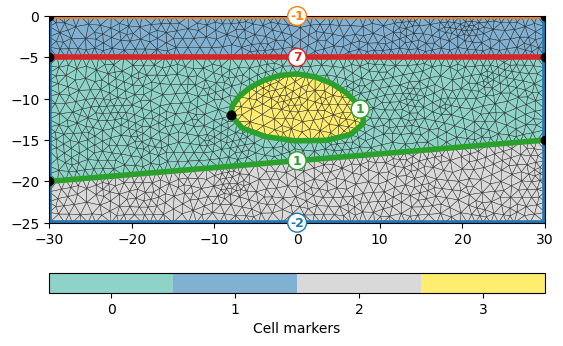

In [8]:
mesh = pg.load('mesh.bms')
print(mesh)
showMesh(mesh, markers = True, showMesh = True);

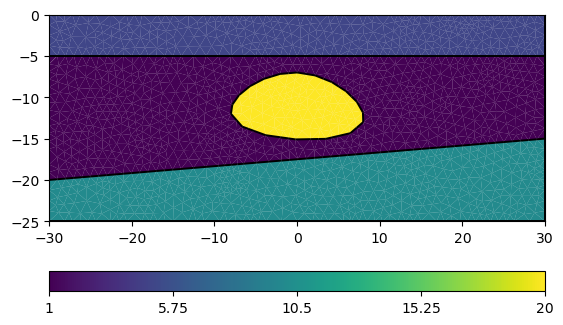

In [10]:
amap = [[0, 1.0], [1, 5.0], [2, 10.0], [3, 20.0]]
showMesh(mesh, amap);

Mesh:  Mesh: Nodes: 1458 Cells: 2762 Boundaries: 4219
Assembling time:  0.07
Solving time:  0.037


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x199705ecb20>)

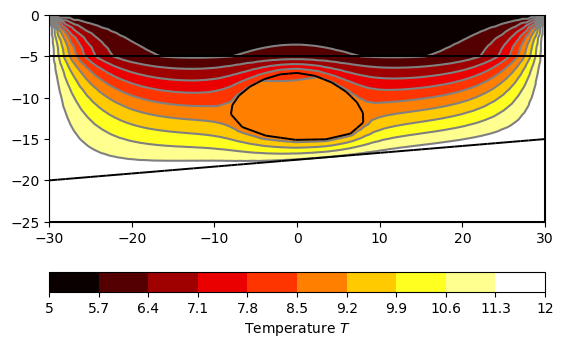

In [17]:
bc = {'Dirichlet':{-1:5.0, -2:12.0}}
# bc = {'Dirichlet':{-1:20}, 'Neumann':{-2:-0.1}}
T = pg.solve(mesh, a = amap, bc = bc, verbose = True)
showMesh(mesh, data=T, label='Temperature $T$', cMap='hot', nLevs=11, showBoundary=True)

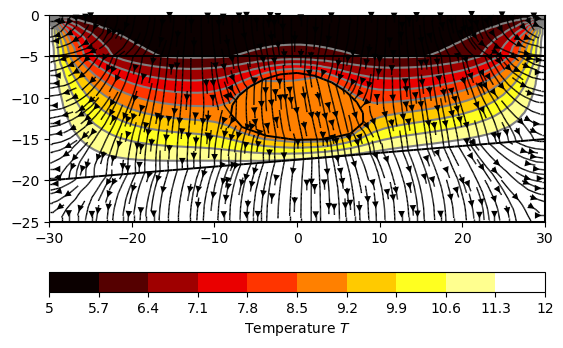

In [18]:
from pygimli.viewer.mpl import drawStreams
ax, cb = showMesh(mesh, data=T, label='Temperature $T$', cMap='hot', nLevs=11, showBoundary=True)
drawStreams(ax, mesh, T)

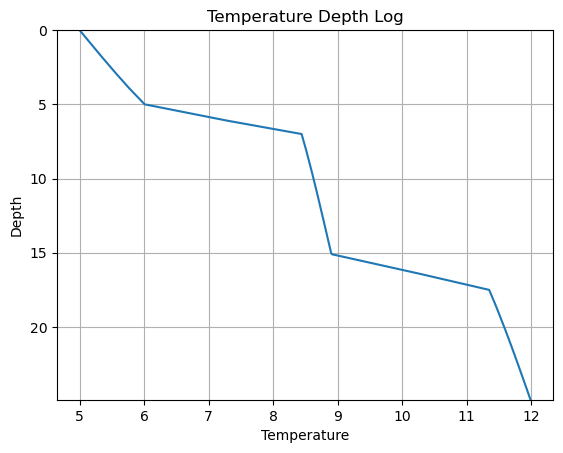

In [23]:
import numpy as np
import matplotlib.pyplot as plt
depth = np.arange(0, 25, 0.1)
pos = [[0, -d] for d in depth]
Tlog = pg.interpolate(mesh, T, pos)
fig, ax = plt.subplots()
ax.plot(Tlog, depth)
ax.set_ylim([max(depth), 0])
ax.set_title('Temperature Depth Log')
ax.set_xlabel('Temperature')
ax.set_ylabel('Depth')
ax.grid(True)